In [ ]:
import requests
import numpy
import pandas as pd
import json
import pickle

yearQueries = ['2013', '2014', '2015', '2016', '2017', '2018', '2019']

json_responses = {"2013": [], "2014": [], "2015": [], "2016": [], "2017": [], "2018": [], "2019": []}
for query in yearQueries: 
    response = requests.get('https://api.dbknews.com/salary/year/'+query)
    data_raw = json.loads(response.content)
    for i in range(0, (int(data_raw["count"])/10)+2):
        response = requests.get('https://api.dbknews.com/salary/year/'+ query + '/?page='+str(i))
        if response.status_code == 200:
            print ("Success")
            data = json.loads(response.content)
            json_responses[query].append(data)
            


In [113]:
df_2013 = []
df_2014 = []
df_2015 = []
df_2016 = []
df_2017 = []
df_2018 = []
df_2019 = []


for key in json_responses:
    for item in json_responses[key]:
        if key == "2013":
            df_2013.append(pd.DataFrame(item["data"]))
        if key == "2014":
            df_2014.append(pd.DataFrame(item["data"]))
        if key == "2015":
            df_2015.append(pd.DataFrame(item["data"]))
        if key == "2016":
            df_2016.append(pd.DataFrame(item["data"]))
        if key == "2017":
            df_2017.append(pd.DataFrame(item["data"]))
        if key == "2018":
            df_2018.append(pd.DataFrame(item["data"]))
        if key == "2019":
            df_2019.append(pd.DataFrame(item["data"]))
            
df_2013_all = pd.concat(df_2013)
df_2013_all['Year'] = "2013"

df_2014_all = pd.concat(df_2014)
df_2014_all['Year'] = "2014"

df_2015_all = pd.concat(df_2015)
df_2015_all['Year'] = "2015"

df_2016_all = pd.concat(df_2016)
df_2016_all['Year'] = "2016"

df_2017_all = pd.concat(df_2017)
df_2017_all['Year'] = "2017"

df_2018_all = pd.concat(df_2018)
df_2018_all['Year'] = "2018"

df_2019_all = pd.concat(df_2019)
df_2019_all['Year'] = "2019"

salaries_df_list = [df_2013_all, df_2014_all, df_2015_all, df_2016_all, df_2017_all, df_2018_all, df_2019_all]

salariesOverTime = pd.concat(salaries_df_list)
salariesOverTime = salariesOverTime.drop_duplicates()
salariesOverTime = salariesOverTime.reset_index()
salariesOverTime.to_pickle('df/salaries_over_time')
salariesOverTime

,index,Department,Division,Employee,Salary,Title,Year
0,0,ENGR-Electrical & Computer Engineering,A. James Clark School of Engineering,"Abed, Eyad H","$216,648.00",Prof,2013
1,1,ENGR-Electrical & Computer Engineering,A. James Clark School of Engineering,"Abshire, Pamela A.","$82,872.96",Assoc Prof,2013
2,2,ENGR-Institute for Systems Research,A. James Clark School of Engineering,"Abshire, Pamela A.","$55,149.36",Assoc Prof,2013
3,3,ENGR-Fischell Department of Bioengineering,A. James Clark School of Engineering,"Abts, Leigh R","$126,334.14",Res Assoc Prof,2013
4,4,ENGR-Continuing & Distance Learning in Engr,A. James Clark School of Engineering,"Adams, Douglas J","$64,260.00",Engineer,2013
5,5,ENGR-Materials Science & Engineering,A. James Clark School of Engineering,"Adams, Vincent G.","$83,717.52",Coordinator,2013
6,6,ENGR-A. James Clark School of Engineering,A. James Clark School of Engineering,"Addo, Kofi Frimpong",$10.20,Office Assistant,2013
7,7,ENGR-Chemical & Biomolecular Engineering,A. James Clark School of Engineering,"Adomaitis, Raymond A.","$91,638.84",Prof,2013
8,8,ENGR-Institute for Systems Research,A. James Clark School of Engineering,"Adomaitis, Raymond A.","$54,758.70",Prof,2013
9,9,ENGR-Civil & Enviromental Engr,A. James Clark School of Engineering,"Aggour, Mohamed Sherif","$113,814.32",Prof,2013


In [117]:
salariesOverTime['Salary'] = salariesOverTime['Salary'].replace('[\$,]', '', regex=True).astype(float)

avg_df = salariesOverTime.groupby(['Year']).mean()
# avg_df.columns = ["Year", "Average Salary"]

avg_df.drop(['index'], axis=1)
avg_df = avg_df.reset_index()


Text(0.5,1,'Average Salaries at UMD from 2013-2019 (from DBK Data)')

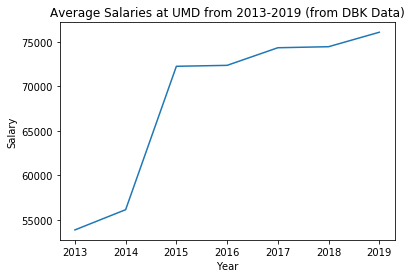

In [118]:
#increase in avg salary

import seaborn as sns

sns.lineplot(x="Year", y="Salary", data=avg_df).set_title("Average Salaries at UMD from 2013-2019 (from DBK Data)")


In [138]:
# We should consider changing this to only show the top 50 departments with highest average salary and show their change
# No real meaning to the graph if we can't understand itbb 

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px

#deparments with highest avg salary
dept_averages = salariesOverTime.groupby(['Year','Department']).mean()
dept_averages = dept_averages.reset_index()
dept_averages.to_pickle('df/salaryAvg_depts')

departments = salariesOverTime.Department.unique()


fig = px.line(dept_averages, x="Year", y="Salary", color="Department",
              hover_name="Department")

fig.show()

fig = px.scatter(dept_averages, x="Year", y="Salary", size="Salary", color="Department",
           hover_name="Department", log_x=True, size_max=60)

fig.show()
# figure(figsize=[20, 12])

# for i in range(len(departments)):
#     str_dept = departments[i]
#     averages = dept_averages.loc[dept_averages['Department'] == str_dept].sort_values(by='Year', ascending=True)['Salary']
#     years = dept_averages.loc[dept_averages['Department'] == str_dept].sort_values(by='Year', ascending=True)['Year']
# #     print(str_dept)
# #     print(len(averages.values))
# #     print()
#     plt.plot(list(years.values), list(averages.values), linewidth=4, label=str_dept);

# plt.title("Average Salary for Each Department from 2013 - 2019", fontsize=27)
# # plt.xlabel("asd", fontsize=25)
# # plt.ylabel("Number of Crimes", fontsize=25)
# # plt.xticks(fontsize=22)
# # plt.yticks(fontsize=22)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 30})
# plt.show()


In [124]:
# Idea for ML - predict salary based on Title, Department, and Division 